In [61]:
 from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '47f36c40-6672-4c61-b7ab-0451a15458de',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-10-10T14:56:44.777Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 8954}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10488, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [62]:
type(data)

dict

In [63]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [64]:
df  = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10488,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19509606.00000,19509606.00000,False,NaN,1,NaN,NaN,None,2023-10-10T14:55:00.000Z,27446.11960,10374546848.95060,2.64460,0.27138,-0.19643,0.35340,6.47659,-6.92845,-10.95458,535462979596.71570,50.14870,576368511569.68994,None,2023-10-10T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 20:26:43.399625
1,1027,Ethereum,ETH,ethereum,7518,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120250549.97124,120250549.97124,True,NaN,2,NaN,NaN,None,2023-10-10T14:55:00.000Z,1575.58932,6129044018.70639,27.85240,0.11388,-1.01616,-4.42619,-2.91941,-14.95769,-16.97747,189465482329.85995,17.74440,189465482329.85999,None,2023-10-10T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 20:26:43.399625
2,825,Tether USDt,USDT,tether,63353,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83494944357.81573,86625667477.82788,True,NaN,3,NaN,NaN,None,2023-10-10T14:55:00.000Z,1.00025,18679137013.51380,11.07780,0.00659,0.01042,0.02668,0.04469,0.10996,0.00676,83515830760.70717,7.81640,86647337036.45000,None,2023-10-10T14:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-10 20:26:43.399625
3,1839,BNB,BNB,bnb,1670,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845445.25508,153845445.25508,False,NaN,4,NaN,NaN,None,2023-10-10T14:55:00.000Z,207.77146,516712523.93002,72.13010,0.33463,0.04001,-2.65743,-2.28756,-13.69819,-16.04347,31964692544.28122,2.99170,31964692544.28000,None,2023-10-10T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 20:26:43.399625
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53387299665.00000,99988380689.00000,False,NaN,5,NaN,NaN,None,2023-10-10T14:55:00.000Z,0.49572,713985575.80392,-17.38390,0.18849,-1.11283,-2.69363,-0.44762,-21.64131,4.58478,26465010239.44092,2.47860,49571734111.87000,None,2023-10-10T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 20:26:43.399625
5,3408,USDC,USDC,usd-coin,14382,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25372584607.97612,25372584607.97612,False,NaN,6,NaN,NaN,None,2023-10-10T14:55:00.000Z,1.00014,2558655790.99465,17.52220,0.01450,0.01130,0.01525,0.01253,-0.01236,-0.00441,25376199058.71425,2.37660,25376199058.71000,None,2023-10-10T14:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-10 20:26:43.399625
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,414379192.02228,559508444.92869,True,NaN,7,NaN,NaN,None,2023-10-10T14:55:00.000Z,22.24828,275406155.17859,-2.37320,0.28198,-0.03966,-7.09942,22.53665,-10.28573,-1.73088,9219222577.49243,0.86350,12448098232.47000,None,2023-10-10T14:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 20:26:43.399625
7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35151022078.76200,36244287752.86600,False,NaN,8,NaN,NaN,None,2023-10-10T14:55:00.000Z,0.24915,116268896.42895,7.07130,-0.12663,-0.82187,-4.70569,0.00358,-15.86985,-15.09053,8757937394.87989,0.81970,11211827123.73000,None,2023-10-10T14:55:00.000Z,NaN,NaN,

In [65]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '47f36c40-6672-4c61-b7ab-0451a15458de',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
df2  = pd.json_normalize(data['data'])
df2['timestamp']= pd.to_datetime('now')
df

if not os.path.isfile(r'C:\Users\dkamr\Documents\Untitled Folder\CryptoAPI.csv'):
    df.to_csv(r'C:\Users\dkamr\Documents\Untitled Folder\CryptoAPI.csv', header='columns_names')

else: df.to_csv(r'C:\Users\dkamr\Documents\Untitled Folder\CryptoAPI.csv', mode='a' , header=False)
  


{'status': {'timestamp': '2023-10-10T14:56:46.413Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 8954}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10488, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [108]:
import os
import time

for i in range(333):
    api_runner()
    print('API Runner completed')
    time.sleep(60)  # Use time.sleep() to pause execution for 60 seconds

exit()

API Runner completed


KeyboardInterrupt: 

In [84]:
df55 = pd.read_csv(r'C:\Users\dkamr\Documents\Untitled Folder\CryptoAPI.csv')
df55

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10487,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19509375.00000,19509375.00000,False,NaN,1,NaN,NaN,NaN,2023-10-10T09:30:00.000Z,27657.55747,11763640055.26010,47.30840,-0.15399,-0.40826,0.36351,6.97920,-5.78031,-9.91401,539581660323.20026,50.23770,580808706931.27002,NaN,2023-10-10T09:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 15:02:53.654151
1,1,1027,Ethereum,ETH,ethereum,7516,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120250549.97124,120250549.97124,True,NaN,2,NaN,NaN,NaN,2023-10-10T09:30:00.000Z,1588.74476,7091748645.48021,100.24620,-0.22146,-1.71078,-4.46469,-2.25656,-13.92093,-15.86187,191047430688.75952,17.78750,191047430688.76001,NaN,2023-10-10T09:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 15:02:53.654151
2,2,825,Tether USDt,USDT,tether,63332,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83494944357.81573,86625667477.82788,True,NaN,3,NaN,NaN,NaN,2023-10-10T09:29:00.000Z,1.00011,20380931851.09529,52.55170,-0.00161,-0.01508,0.00473,0.04356,0.15673,0.01360,83504283786.30023,7.77420,86635357097.14999,NaN,2023-10-10T09:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-10 15:02:53.654151
3,3,1839,BNB,BNB,bnb,1669,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153845485.12223,153845485.12223,False,NaN,4,NaN,NaN,NaN,2023-10-10T09:30:00.000Z,208.93792,455940676.51923,64.20290,0.05179,-0.86501,-3.01814,-1.90948,-12.96210,-15.82021,32144156390.20096,2.99260,32144156390.20000,NaN,2023-10-10T09:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 15:02:53.654151
4,4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53387299665.00000,99988380689.00000,False,NaN,5,NaN,NaN,NaN,2023-10-10T09:30:00.000Z,0.49882,894554945.64733,57.14000,-0.44006,-2.15856,-2.05553,-0.31770,-20.84464,5.25971,26630906033.79360,2.47950,49882474298.01000,NaN,2023-10-10T09:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 15:02:53.654151
5,5,3408,USDC,USDC,usd-coin,14381,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25487595453.99260,25487595453.99260,False,NaN,6,NaN,NaN,NaN,2023-10-10T09:29:00.000Z,0.99992,2742474112.19512,51.76810,-0.00946,-0.00917,-0.01043,-0.00756,-0.01233,0.00137,25485560293.16395,2.37280,25485560293.16000,NaN,2023-10-10T09:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-10 15:02:53.654151
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,414379453.02428,559508706.79071,True,NaN,7,NaN,NaN,NaN,2023-10-10T09:29:00.000Z,22.31351,345991592.08848,75.56850,-0.36380,-2.46634,-7.65944,20.99131,-8.81910,1.31183,9246258299.07164,0.86080,12484600734.45000,NaN,2023-10-10T09:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-10 15:02:53.654151
7,7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35150108365.16900,36244287752.86600,False,NaN,8,NaN,NaN,NaN,2023-10-10T09:29:00.000Z,0.25233,128297484.49246,58.54520,-0.23320,-1.40633,-3.89194,0.96544,-14.65503,-13.82819,8869437728.30217,0.82570,11354863934.62000,NaN,2023-10-10T09

In [85]:
pd.set_option('display.float_format' , lambda x: '%.5f' % x)

In [86]:
 df3 = df.groupby('name', sort =False)[['quote.USD.percent_change_1h' , 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d' , 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.27138,-0.19643,0.35340,6.47659,-10.95458
Ethereum,0.11388,-1.01616,-4.42619,-2.91941,-16.97747
Tether USDt,0.00659,0.01042,0.02668,0.04469,0.00676
BNB,0.33463,0.04001,-2.65743,-2.28756,-16.04347
XRP,0.18849,-1.11283,-2.69363,-0.44762,4.58478
USDC,0.01450,0.01130,0.01525,0.01253,-0.00441
Solana,0.28198,-0.03966,-7.09942,22.53665,-1.73088
Cardano,-0.12663,-0.82187,-4.70569,0.00358,-15.09053
Dogecoin,0.26181,-0.18684,-4.20586,-4.23184,-9.85237


In [87]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.27138
           quote.USD.percent_change_24h    -0.19643
           quote.USD.percent_change_7d      0.35340
           quote.USD.percent_change_30d     6.47659
           quote.USD.percent_change_90d   -10.95458
                                             ...   
Avalanche  quote.USD.percent_change_1h      0.13140
           quote.USD.percent_change_24h     1.26803
           quote.USD.percent_change_7d      4.81842
           quote.USD.percent_change_30d     1.53765
           quote.USD.percent_change_90d   -26.75625
Length: 100, dtype: float64

In [88]:
type(df4)

pandas.core.series.Series

In [89]:
df5 = df4.to_frame(name='values')
df5 

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.27138
          quote.USD.percent_change_24h  -0.19643
          quote.USD.percent_change_7d    0.35340
          quote.USD.percent_change_30d   6.47659
          quote.USD.percent_change_90d -10.95458
...                                          ...
Avalanche quote.USD.percent_change_1h    0.13140
          quote.USD.percent_change_24h   1.26803
          quote.USD.percent_change_7d    4.81842
          quote.USD.percent_change_30d   1.53765
          quote.USD.percent_change_90d -26.75625

[100 rows x 1 columns]

In [90]:
type(df5)

pandas.core.frame.DataFrame

In [91]:
df5.count()

#df5 = df5.set_index(df5['name'])


values    100
dtype: int64

In [92]:
index = pd.Index(range(100))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27138
1,Bitcoin,quote.USD.percent_change_24h,-0.19643
2,Bitcoin,quote.USD.percent_change_7d,0.35340
3,Bitcoin,quote.USD.percent_change_30d,6.47659
4,Bitcoin,quote.USD.percent_change_90d,-10.95458
...,...,...,...
95,Avalanche,quote.USD.percent_change_1h,0.13140
96,Avalanche,quote.USD.percent_change_24h,1.26803
97,Avalanche,quote.USD.percent_change_7d,4.81842
98,Avalanche,quote.USD.percent_change_30d,1.53765


In [104]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27138
1,Bitcoin,quote.USD.percent_change_24h,-0.19643
2,Bitcoin,quote.USD.percent_change_7d,0.35340
3,Bitcoin,quote.USD.percent_change_30d,6.47659
4,Bitcoin,90d,-10.95458
...,...,...,...
95,Avalanche,quote.USD.percent_change_1h,0.13140
96,Avalanche,quote.USD.percent_change_24h,1.26803
97,Avalanche,quote.USD.percent_change_7d,4.81842
98,Avalanche,quote.USD.percent_change_30d,1.53765


In [105]:
df7 = df7.rename(columns={'level_1': 'percent_change'})

In [95]:

import matplotlib as plt

In [96]:

import seaborn as sns

C:\Users\dkamr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


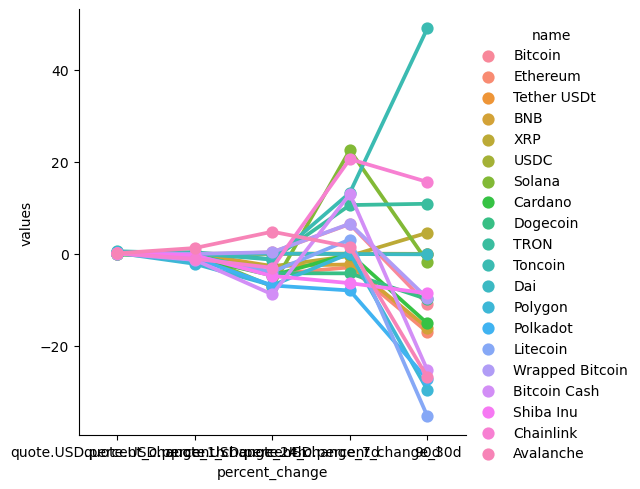

In [106]:
sns.catplot(x='percent_change' , y='values' , hue = 'name' , data = df7, kind='point')

In [109]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name== 'Bitcoin'")
df8


,name,quote.USD.price,timestamp
0,Bitcoin,27446.11960,2023-10-10 20:26:43.399625


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

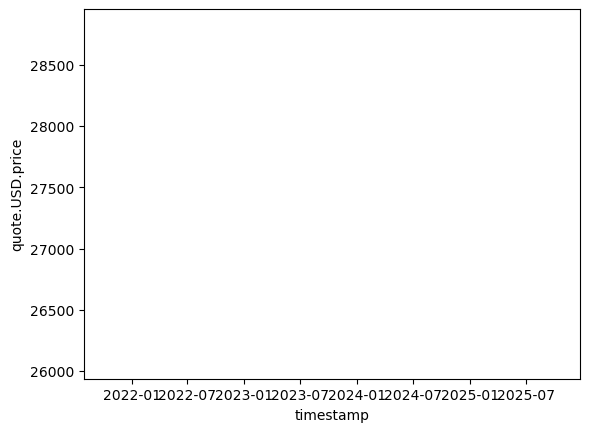

In [99]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)